In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Cargamos la base que esta separada con ";" y mostramos la cantidad de filas y columnas
df_cardio = pd.read_csv("/content/drive/MyDrive/dataset/cardiovascular_diseases_dv3.csv", sep=";")
df_cardio.shape

(68783, 12)

In [ ]:
# Mostramos un ejemplo de 10 registros al azar de la base
df_cardio.sample (10)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
61585,60,1,163,74,140,90,1,1,0,0,1,0
16964,52,2,172,72,140,80,2,1,0,0,1,0
54102,52,1,150,60,130,90,1,1,0,1,1,1
62930,43,2,171,70,100,60,1,1,1,0,0,0
61026,55,1,163,80,130,80,2,2,0,0,1,0
27294,59,1,155,76,110,80,1,1,0,0,1,0
4108,54,1,163,71,120,80,1,1,0,0,1,0
19035,40,2,174,60,110,70,1,1,0,0,1,0
61084,40,1,160,60,120,80,1,1,0,0,0,1
45906,50,1,176,93,120,80,1,1,0,0,1,0


#Primeras Entregas


Text(0, 0.5, 'Cantidad de sujetos')

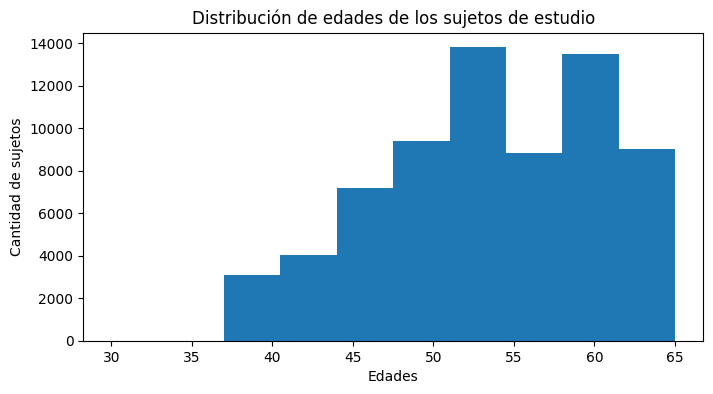

In [ ]:
# Buscamos conocer el rango de edades de la base para así conocer el espectro en el que el modelo va a funcionar.
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df_cardio.AGE)
ax.set_title ("Distribución de edades de los sujetos de estudio")
ax.set_xlabel ("Edades")
ax.set_ylabel ("Cantidad de sujetos")

El histograma anterior nos indica que los sujetos de estudio estan mayormente entre 50 y 60 años

Text(0, 0.5, 'Altura en cm')

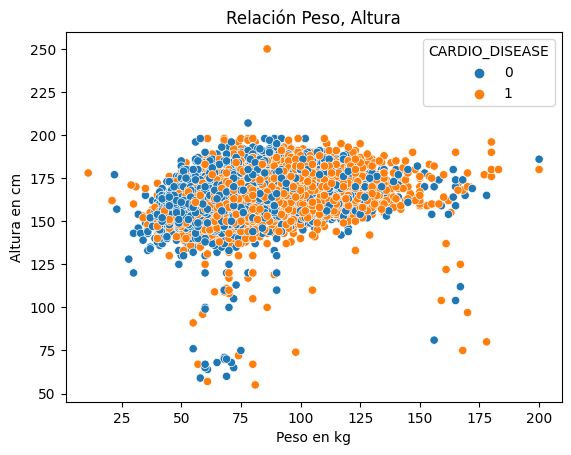

In [ ]:
# Evaluamos el peso de los individuos en funcion de su altura y diferenciamos enfermos de no enfermos.
f, ax = plt.subplots()
sns.scatterplot (data = df_cardio, x= "WEIGHT", y= "HEIGHT", hue="CARDIO_DISEASE")
ax.set_title ("Relación Peso, Altura")
ax.set_xlabel ("Peso en kg")
ax.set_ylabel ("Altura en cm")

Si bien el anterior gráfico nos indica que tiene una relacion peso por altura elevada, lo que nos permite concluir obesidad de los sujetos, se observa una mayor concentración de enfermos cardíacos por encima de los 90kg.

Text(0, 0.5, 'Sexo')

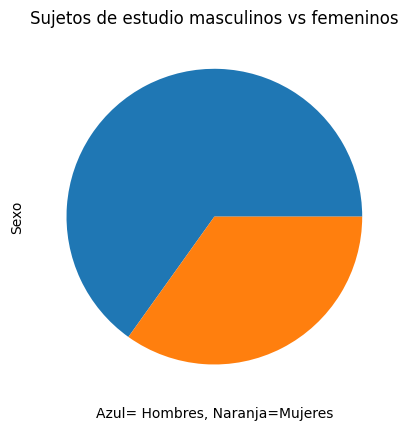

In [ ]:
# Buscamos conocer si el modelo se va a adecuar mejor a sujetos masculinos o a femeninos.
Cantidaddesexo = df_cardio.GENDER.value_counts()
fig, ax = plt.subplots ()
ax.pie (Cantidaddesexo)
ax.set_title ("Sujetos de estudio masculinos vs femeninos")
ax.set_xlabel ("Azul= Hombres, Naranja=Mujeres")
ax.set_ylabel ("Sexo")

El gráfico de pie anterior nos muestra la distribución de sujetos masculinos con relación a los sujetos femeninos al 100%

Text(0, 0.5, 'Presion Sistolica en mmHg')

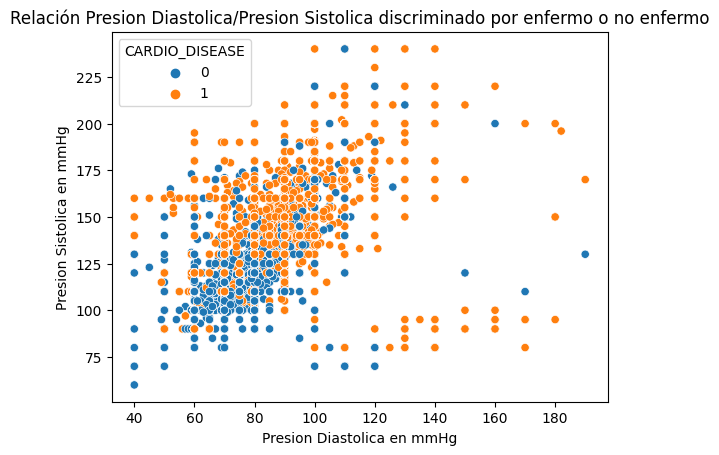

In [ ]:
# Relacionamos presion diastolica con presion sistolica y diferenciamos entre enfermo y no enfermo
f, ax = plt.subplots()
sns.scatterplot (data = df_cardio, x= "AP_LOW", y= "AP_HIGH", hue="CARDIO_DISEASE")
ax.set_title ("Relación Presion Diastolica/Presion Sistolica discriminado por enfermo o no enfermo")
ax.set_xlabel ("Presion Diastolica en mmHg")
ax.set_ylabel ("Presion Sistolica en mmHg")

A partir del gráfico anterior podemos inducir que los individuos de presion sistolica y diatolica bajas tienden a no manifestar enfermedades cardíacas, mientras que si una de las variables sube aumenta la cantidad de casos enfermos.

Text(0, 0.5, 'Peso en Kg')

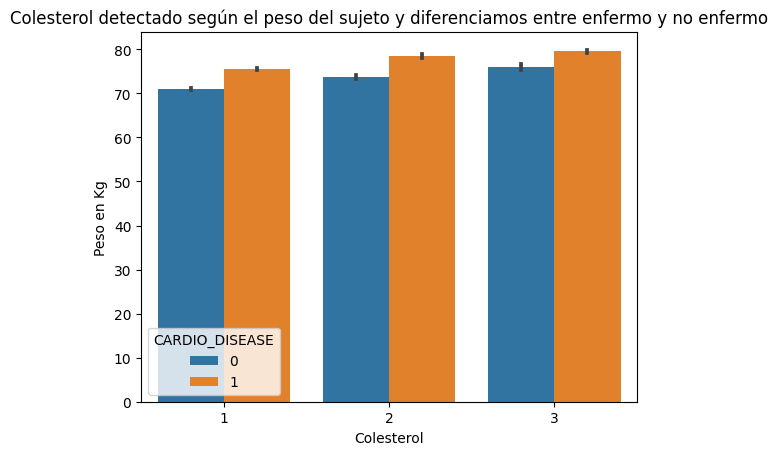

In [ ]:
# Buscamos conocer si valores bajos, medios o altos de colesterol influyen en el diagnostico
fig, ax =plt.subplots()
sns.barplot (data=df_cardio , x="CHOLESTEROL", y= "WEIGHT", hue="CARDIO_DISEASE")
ax.set_title ("Colesterol detectado según el peso del sujeto y diferenciamos entre enfermo y no enfermo")
ax.set_xlabel ("Colesterol")
ax.set_ylabel ("Peso en Kg")

Concluímos que la cantidad de colesterol no afecta al diagnostico pero sí los sujetos mas pesados tienden a estar enfermos.

# Modelos machine learning


Investigaremos diferentes modelos de clasificación y evaluaremos cada uno para seleccionar el mejor. Los modelos que se evaluarán son los siguientes:

Random Forest

SVM

KNN

Naive Bayes

XGBoost

In [ ]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Cargar los datos
X = df_cardio.iloc[:,0:10]
Y = df_cardio.iloc[:,11]
X.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL
0,50,2,168,62,110,80,1,1,0,0
1,55,1,156,85,140,90,3,1,0,0
2,52,1,165,64,130,70,3,1,0,0
3,48,2,169,82,150,100,1,1,0,0
4,48,1,156,56,100,60,1,1,0,0


In [ ]:
# Definimos datos nulos
def nulos(df_cardio) :
  cant = len(df_cardio)
  for col in df_cardio.columns:
    print (col, ":", round (df_cardio[col].isnull().sum() * 100 / cant, 2), '%')

nulos (df_cardio)


AGE : 0.0 %
GENDER : 0.0 %
HEIGHT : 0.0 %
WEIGHT : 0.0 %
AP_HIGH : 0.0 %
AP_LOW : 0.0 %
CHOLESTEROL : 0.0 %
GLUCOSE : 0.0 %
SMOKE : 0.0 %
ALCOHOL : 0.0 %
PHYSICAL_ACTIVITY : 0.0 %
CARDIO_DISEASE : 0.0 %


In [ ]:
# Separamos la base en una parte de entrenamiento y otra de testeo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, train_size=0.75, random_state=0)

In [ ]:
# ajustar arbol de decisión simple con hiperparametros (defecto)
Arbol = DecisionTreeClassifier ()
Arbol_enfermedad = Arbol.fit(X_train, Y_train)

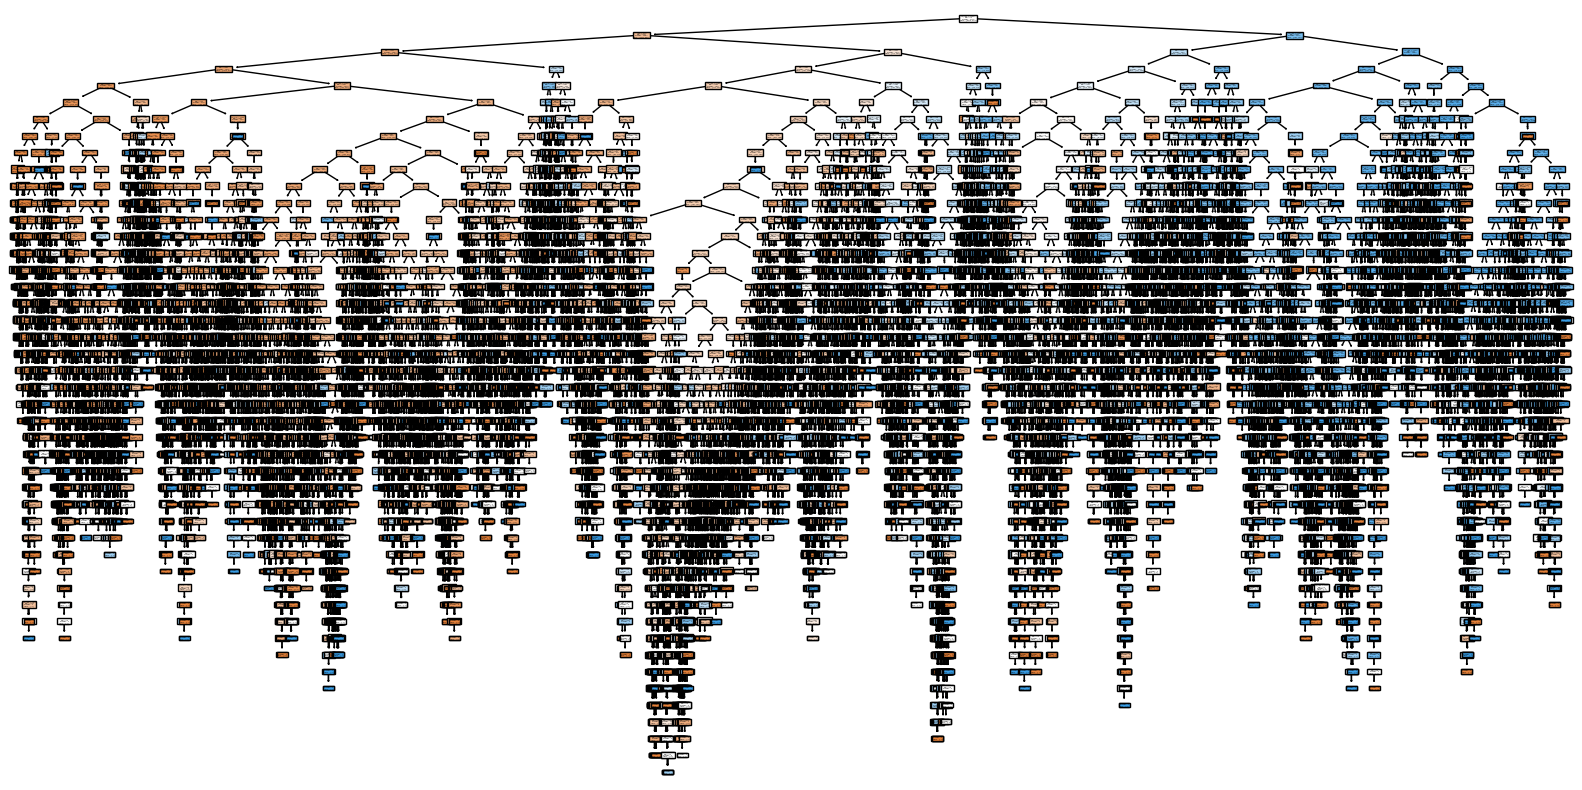

In [ ]:
# Graficando
from sklearn.tree import plot_tree
fig, ax =plt.subplots(figsize=(20,10))
plot_tree (decision_tree=Arbol, feature_names=X.columns, filled=True)
plt.show()

# Data Wrangling

Descubrimiento

In [4]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [5]:
# Definimos datos nulos
def nulos(df_cardio) :
  cant = len(df_cardio)
  for col in df_cardio.columns:
    print (col, ":", round (df_cardio[col].isnull().sum() * 100 / cant, 2), '%')

nulos (df_cardio)

AGE : 0.0 %
GENDER : 0.0 %
HEIGHT : 0.0 %
WEIGHT : 0.0 %
AP_HIGH : 0.0 %
AP_LOW : 0.0 %
CHOLESTEROL : 0.0 %
GLUCOSE : 0.0 %
SMOKE : 0.0 %
ALCOHOL : 0.0 %
PHYSICAL_ACTIVITY : 0.0 %
CARDIO_DISEASE : 0.0 %


In [6]:
df_cardio.isnull()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,False,False,False,False,False,False,False,False,False,False,False,False
68779,False,False,False,False,False,False,False,False,False,False,False,False
68780,False,False,False,False,False,False,False,False,False,False,False,False
68781,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

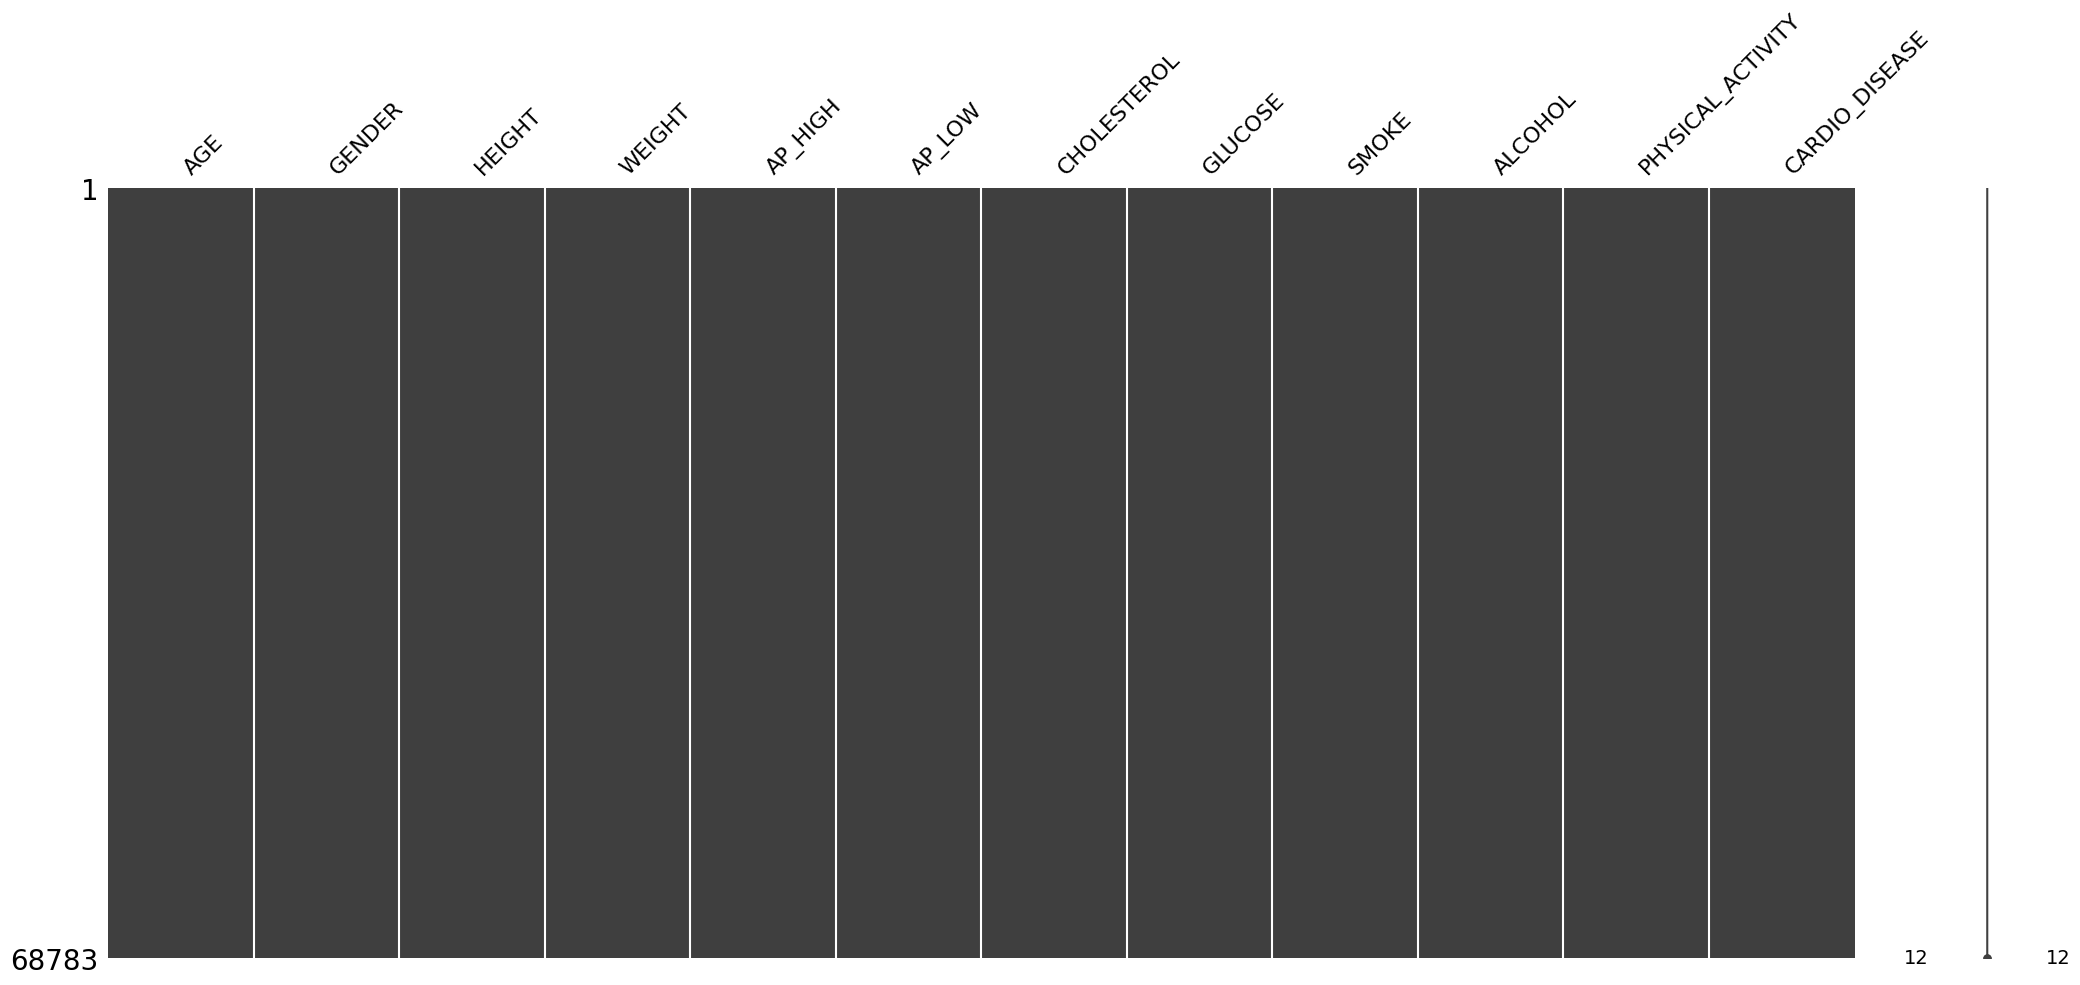

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(df_cardio)

Enriquecimiento

In [8]:
df_cardio2 = pd.read_csv("/content/drive/MyDrive/dataset/cardio2.csv", sep=",")
df_cardio2.shape

(3390, 17)

In [9]:
df_cardio2.sample(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
542,542,49,2.0,F,YES,20.0,0.0,0,0,0,229.0,118.5,76.5,21.42,76.0,NaN,0
1219,1219,62,4.0,F,NO,0.0,0.0,0,0,0,NaN,122.0,75.5,23.03,75.0,NaN,0
924,924,63,1.0,F,NO,0.0,0.0,0,0,0,362.0,151.5,82.5,25.15,102.0,NaN,0


In [10]:
df_cardio.sample(3)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
68218,64,1,170,89,120,80,1,1,0,0,1,0
20326,60,1,166,80,150,90,1,1,0,0,1,0
29225,56,1,174,75,150,90,1,1,0,0,0,1


In [11]:
#duplicamos el df para trabajar sobre las columnas height y weigth para calcular el indice de masa corporal (BMI)
df_cardioIBM = df_cardio

In [12]:
df_cardioIBM ['bmi1'] = (df_cardioIBM.HEIGHT/100)*(df_cardioIBM.HEIGHT/100)

In [13]:
df_cardioIBM ['BMI'] = df_cardioIBM.WEIGHT/df_cardioIBM.bmi1

In [14]:
df_cardioIBM.pop ('WEIGHT')

0         62
1         85
2         64
3         82
4         56
        ... 
68778     76
68779    126
68780    105
68781     72
68782     72
Name: WEIGHT, Length: 68783, dtype: int64

In [15]:
df_cardioIBM.pop ('HEIGHT')

0        168
1        156
2        165
3        169
4        156
        ... 
68778    168
68779    158
68780    183
68781    163
68782    170
Name: HEIGHT, Length: 68783, dtype: int64

In [16]:
df_cardioIBM.pop ('bmi1')

0        2.8224
1        2.4336
2        2.7225
3        2.8561
4        2.4336
          ...  
68778    2.8224
68779    2.4964
68780    3.3489
68781    2.6569
68782    2.8900
Name: bmi1, Length: 68783, dtype: float64

In [17]:
df_cardioIBM.sample(3)

,AGE,GENDER,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI
56927,59,2,120,80,1,1,0,0,1,0,28.373702
41960,62,2,120,80,1,1,0,0,1,1,33.462225
59674,52,1,120,80,1,1,1,0,1,0,20.028842


In [18]:
#definimos null causados por la operación anterior
def nulos(df_cardioIBM) :
  cant = len(df_cardioIBM)
  for col in df_cardioIBM.columns:
    print (col, ":", round (df_cardioIBM[col].isnull().sum() * 100 / cant, 2), '%')

nulos (df_cardioIBM)

AGE : 0.0 %
GENDER : 0.0 %
AP_HIGH : 0.0 %
AP_LOW : 0.0 %
CHOLESTEROL : 0.0 %
GLUCOSE : 0.0 %
SMOKE : 0.0 %
ALCOHOL : 0.0 %
PHYSICAL_ACTIVITY : 0.0 %
CARDIO_DISEASE : 0.0 %
BMI : 0.0 %


In [19]:
#Modificamos en la base a agregar el sexo para que este expresado igual que en nuestra df inicial
df_cardio2_1 = df_cardio2.replace(['F','M'], ['1','2'])
df_cardio2_1.sample(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1110,1110,44,1.0,2,YES,20.0,0.0,0,1,0,246.0,136.0,94.0,24.56,85.0,86.0,0
1524,1524,42,3.0,2,YES,10.0,0.0,0,0,0,225.0,128.0,82.0,26.79,70.0,85.0,0
468,468,56,3.0,2,NO,0.0,0.0,0,1,0,239.0,177.5,98.0,29.44,82.0,105.0,1


In [20]:
#modificamos como esta expresado si es fumador o no
df_cardio2_2 = df_cardio2_1.replace(['NO','YES'], ['0','1'])
df_cardio2_2.sample(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3089,3089,45,1.0,1,0,0.0,0.0,0,0,0,288.0,135.0,88.0,25.23,85.0,79.0,0
1453,1453,58,1.0,2,1,13.0,0.0,0,0,0,196.0,120.0,74.0,20.12,75.0,73.0,0
3149,3149,47,4.0,1,1,10.0,0.0,0,0,0,205.0,107.0,68.0,23.29,90.0,108.0,0


In [21]:
from os import replace
#Agregamos una columna en donde reemplazaremos los valores de colesterol por el indicador como esta en nuestra df
df_cardio2_2 ['CHOLESTEROL']= np.where(df_cardio2_2['totChol']<100,'1','2')

In [22]:
df_cardio2_2.pop ('totChol')

0       221.0
1       212.0
2       250.0
3       233.0
4       241.0
        ...  
3385    261.0
3386    199.0
3387    352.0
3388    191.0
3389    288.0
Name: totChol, Length: 3390, dtype: float64

In [23]:
df_cardio2_2.sample(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,CHOLESTEROL
2554,2554,62,1.0,1,0,0.0,0.0,0,0,0,145.0,82.5,28.27,63.0,75.0,0,2
37,37,63,2.0,1,0,0.0,0.0,0,1,0,186.5,97.0,30.47,60.0,96.0,0,2
2631,2631,42,2.0,2,1,5.0,0.0,0,0,0,113.0,81.0,26.17,90.0,71.0,0,2


In [24]:
#Eliminamos columnas que no nos sirven
df_cardio2_2.pop ('education')

0       2.0
1       4.0
2       1.0
3       1.0
4       1.0
       ... 
3385    1.0
3386    1.0
3387    3.0
3388    1.0
3389    3.0
Name: education, Length: 3390, dtype: float64

In [25]:
df_cardio2_2.pop ('cigsPerDay')

0        3.0
1        0.0
2       10.0
3       20.0
4       30.0
        ... 
3385     0.0
3386     0.0
3387     3.0
3388     0.0
3389     0.0
Name: cigsPerDay, Length: 3390, dtype: float64

In [26]:
df_cardio2_2.pop ('BPMeds')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3385    0.0
3386    0.0
3387    0.0
3388    NaN
3389    0.0
Name: BPMeds, Length: 3390, dtype: float64

In [27]:
df_cardio2_2.pop ('prevalentStroke')

0       0
1       0
2       0
3       0
4       0
       ..
3385    0
3386    0
3387    0
3388    0
3389    0
Name: prevalentStroke, Length: 3390, dtype: int64

In [28]:
df_cardio2_2.pop ('prevalentHyp')

0       0
1       1
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    1
3389    0
Name: prevalentHyp, Length: 3390, dtype: int64

In [29]:
df_cardio2_2.pop ('heartRate')

0       90.0
1       72.0
2       88.0
3       68.0
4       70.0
        ... 
3385    70.0
3386    80.0
3387    73.0
3388    80.0
3389    79.0
Name: heartRate, Length: 3390, dtype: float64

In [30]:
df_cardio2_2.pop ('glucose')

0        80.0
1        75.0
2        94.0
3        94.0
4        77.0
        ...  
3385    103.0
3386     84.0
3387     72.0
3388     85.0
3389     92.0
Name: glucose, Length: 3390, dtype: float64

In [31]:
df_cardio2_2.pop ('id')

0          0
1          1
2          2
3          3
4          4
        ... 
3385    3385
3386    3386
3387    3387
3388    3388
3389    3389
Name: id, Length: 3390, dtype: int64

In [32]:
df_cardio2_2.sample(3)

,age,sex,is_smoking,diabetes,sysBP,diaBP,BMI,TenYearCHD,CHOLESTEROL
1003,39,1,1,0,131.5,85.0,24.79,0,2
997,55,1,1,0,138.0,87.0,25.33,1,2
1929,46,1,0,0,118.0,79.0,26.83,0,2


In [33]:
#renombramos las columnas para que coincidan con el df base
df_cardio2final = df_cardio2_2.rename (columns={'age':'AGE',
                                                'sex':'GENDER',
                                                'is_smoking':'SMOKE',
                                                'sysBP':'AP_HIGH',
                                                'diaBP':'AP_LOW',
                                                'TenYearCHD':'CARDIO_DISEASE',
                                                'diabetes':'GLUCOSE'})

In [34]:
df_cardio2final.sample(3)

,AGE,GENDER,SMOKE,GLUCOSE,AP_HIGH,AP_LOW,BMI,CARDIO_DISEASE,CHOLESTEROL
942,46,1,1,0,115.0,74.0,22.70,0,2
654,38,1,0,0,115.0,60.0,26.87,0,2
1983,61,1,0,0,110.0,78.5,29.04,0,2


In [35]:
#Ya con los datos mas preparados, reconocemos nulls
def nulos(df_cardio2final) :
  cant = len(df_cardio2final)
  for col in df_cardio2final.columns:
    print (col, ":", round (df_cardio2final[col].isnull().sum() * 100 / cant, 2), '%')

nulos (df_cardio2final)

AGE : 0.0 %
GENDER : 0.0 %
SMOKE : 0.0 %
GLUCOSE : 0.0 %
AP_HIGH : 0.0 %
AP_LOW : 0.0 %
BMI : 0.41 %
CARDIO_DISEASE : 0.0 %
CHOLESTEROL : 0.0 %


In [36]:
#como son muy pocos procedemos a eliminarlos
df_cardio2final.dropna()

,AGE,GENDER,SMOKE,GLUCOSE,AP_HIGH,AP_LOW,BMI,CARDIO_DISEASE,CHOLESTEROL
1,36,2,0,0,168.0,98.0,29.77,0,2
2,46,1,1,0,116.0,71.0,20.35,0,2
3,50,2,1,0,158.0,88.0,28.26,1,2
4,64,1,1,0,136.5,85.0,26.42,0,2
5,61,1,0,0,182.0,121.0,32.80,1,2
...,...,...,...,...,...,...,...,...,...
3385,60,1,0,0,123.5,79.0,29.28,0,2
3386,46,1,0,0,102.0,56.0,21.96,0,2
3387,44,2,1,0,164.0,119.0,28.92,1,2
3388,60,2,0,0,167.0,105.0,23.01,0,2


Estructurado

In [37]:
#concatenamos ambas tablas
frames = [ df_cardioIBM , df_cardio2final]
df_cardio_concat= pd.concat (frames)

In [38]:
df_cardio_concat.sample(10)

,AGE,GENDER,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI
27448,61,1,150.0,100.0,1,1,0,0.0,0.0,1,21.644121
42868,45,1,120.0,70.0,1,1,0,0.0,1.0,1,25.631167
50193,42,2,120.0,70.0,1,1,0,1.0,1.0,0,25.564954
23725,49,2,120.0,80.0,1,1,0,0.0,1.0,1,25.153150
45869,60,1,130.0,80.0,1,1,0,0.0,1.0,1,28.934069
25797,60,2,120.0,80.0,1,1,1,1.0,1.0,0,27.469282
4782,54,2,120.0,80.0,3,1,0,0.0,1.0,1,30.436716
28754,60,1,140.0,90.0,3,1,0,0.0,1.0,1,25.390625
7496,54,1,110.0,70.0,2,1,0,0.0,1.0,0,23.183391
67365,58,1,150.0,90.0,1,1,0,0.0,1.0,1,26.218821


Limpieza

In [39]:
#reconocemos null en la nueva df
def nulos(df_cardio_concat) :
  cant = len(df_cardio_concat)
  for col in df_cardio_concat.columns:
    print (col, ":", round (df_cardio_concat[col].isnull().sum() * 100 / cant, 2), '%')

nulos (df_cardio_concat)

AGE : 0.0 %
GENDER : 0.0 %
AP_HIGH : 0.0 %
AP_LOW : 0.0 %
CHOLESTEROL : 0.0 %
GLUCOSE : 0.0 %
SMOKE : 0.0 %
ALCOHOL : 4.7 %
PHYSICAL_ACTIVITY : 4.7 %
CARDIO_DISEASE : 0.0 %
BMI : 0.02 %


In [40]:
# como no sabemos si esos individuos eran alcoholicos o si hacían actividad fisica vamos a suponer que no y reemplazar los Nan con "0"
df_final= df_cardio_concat.fillna(0)

In [41]:
#reconocemos null en la nueva df
def nulos(df_final) :
  cant = len(df_final)
  for col in df_final.columns:
    print (col, ":", round (df_final[col].isnull().sum() * 100 / cant, 2), '%')

nulos (df_final)

AGE : 0.0 %
GENDER : 0.0 %
AP_HIGH : 0.0 %
AP_LOW : 0.0 %
CHOLESTEROL : 0.0 %
GLUCOSE : 0.0 %
SMOKE : 0.0 %
ALCOHOL : 0.0 %
PHYSICAL_ACTIVITY : 0.0 %
CARDIO_DISEASE : 0.0 %
BMI : 0.0 %


In [43]:
df_final['AP_HIGH'] = df_final['AP_HIGH'] .astype('int64')

In [44]:
df_final['AP_LOW'] = df_final['AP_LOW'] .astype('int64')

In [45]:
df_final['GLUCOSE'] = df_final['GLUCOSE'] .astype('int64')

In [46]:
df_final['GENDER'] = df_final['GENDER'] .astype('int64')

In [47]:
df_final['CHOLESTEROL'] = df_final['CHOLESTEROL'] .astype('int64')

In [48]:
df_final['SMOKE'] = df_final['SMOKE'] .astype('int64')

In [49]:
df_final['ALCOHOL'] = df_final['ALCOHOL'] .astype('int64')

In [50]:
df_final['PHYSICAL_ACTIVITY'] = df_final['PHYSICAL_ACTIVITY'] .astype('int64')

In [51]:
df_final['BMI'] = df_final['BMI'] .astype('int64')

Validación

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72173 entries, 0 to 3389
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                72173 non-null  int64
 1   GENDER             72173 non-null  int64
 2   AP_HIGH            72173 non-null  int64
 3   AP_LOW             72173 non-null  int64
 4   CHOLESTEROL        72173 non-null  int64
 5   GLUCOSE            72173 non-null  int64
 6   SMOKE              72173 non-null  int64
 7   ALCOHOL            72173 non-null  int64
 8   PHYSICAL_ACTIVITY  72173 non-null  int64
 9   CARDIO_DISEASE     72173 non-null  int64
 10  BMI                72173 non-null  int64
dtypes: int64(11)
memory usage: 6.6 MB


#StoryTelling


En el presente proyecto buscamos clasificar a un individuo como enfermo o sano a partir de las variables estudiadas para así eliminar o acotar la demanda de turnos medicos.

Contexto y Problema Comercial: solucionar el problema de la falta de turnos, ampliar el tiempo libre del médico que le permita enfocarse en los casos mas complejos mejorando la calidad de atención por problematica, efectivizar y agilizar la respuesta al paciente.

Contexto Analítico: Cada columna de datos es un factor influyente en el diagnostico.

Las variables que trabajamos en primera instancia son:

AGE:  Edad, a mayor edad mayor probabilidad de diagnostico de enfermedad.

HEIGHT: Altura, no es influyente por sí mismo, pero determina la obesidad en realción con WEIGHT, que es el peso del paciente.

GENDER: Genero, influencia a determinar

AP_HIGH: Presion sistolica y AP_LOW: presion diastolica. Altos valores en estas dos variables determinan mayor probabilidad de diagnostico de enfermedad.

CHOLESTEROL: Colesterolemia, valores por encima de 100 influyen en una mayor probabilidad de diagnostico de enfermedad.

GLUCOSE: Valores encima de 120 son diagnostico de diabetes, influencia a determinar

SMOKE: Sujeto fumador tiene mayor probabilidad de diagnostico de enfermedad.

ALCOHOL: Sujeto alcoholico tiene mayor probabilidad de diagnostico de enfermedad.

PHYSICAL_ACTIVITY: Sujetos que no realizan actividad fisica tienen mayor probabilidad de diagnostico de enfermedad.

**Hipotesis**

* Valores altos de presion arterial sistolica (*AP_HIGH*) y la presion arterial diastolica *(AP_LOW*) condicionan enfermedades cardíacas.

* Presencia de colesterol (CHOLESTEROL) en relación al indice de masa corporal (BMI), variables controlables con la dieta, son factores influyentes en el diagnostico.

* El alcoholismo *(ALCOHOL)* y el tabaquismo (*SMOOKE)* son factores influyentes en el diagnostico de enfermedad.

* La actividad fisica *(PHYSICAL_ACTIVITY)* según la edad *(AGE)* implica menor incidencia de enfermedad.

Variables:

AGE:  integer (years of age)

HEIGHT: integer (cm)

WEIGHT: integer (kg)

GENDER: categorical (1: female, 2: male)

AP_HIGH: systolic blood pressure, integer

AP_LOW: diastolic blood pressure, integer

CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)

GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)

SMOKE: categorical (0: no, 1: yes)

ALCOHOL: categorical (0: no, 1: yes)

PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)

**En el siguiente gráfico evaluaremos "Valores altos de presion arterial sistolica (AP_HIGH) y la presion arterial diastolica (AP_LOW) condicionan enfermedades cardíacas."**

Text(0, 0.5, 'Presion Sistolica en mmHg')

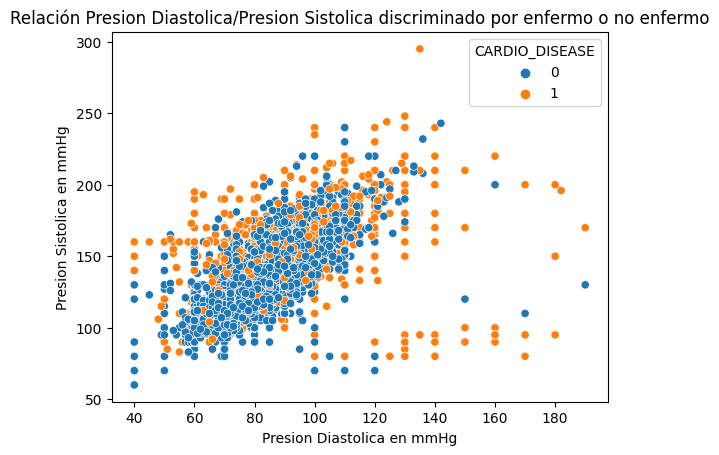

In [ ]:
f, ax = plt.subplots()
sns.scatterplot (data = df_cardio_concat, x= "AP_LOW", y= "AP_HIGH", hue="CARDIO_DISEASE")
ax.set_title ("Relación Presion Diastolica/Presion Sistolica discriminado por enfermo o no enfermo")
ax.set_xlabel ("Presion Diastolica en mmHg")
ax.set_ylabel ("Presion Sistolica en mmHg")

A partir del gráfico anterior podemos inducir que los individuos de presion sistolica (eje y) por encima de 125 tienen una mayor tendencia a expresar una enfermedad cardíaca siendo que 120 es el valor "normal".

En cuando a presiones diastolicas (eje x), la mayor concentración de enfermos se haya entre 80 y 100, pese a que también son los valores considerados como "normal" lo cual nos indica que por sí solo no es un factor determinante.

En situaciones donde tanto la presion sistolica como la diastolica tienen valores por encima de lo normal baja la probabilidad de ser un individuo sano.

En individuos con ambas variables por debajo de lo normal no presentan enfermedades cardíacas en su mayoría.

En casos donde la presion diastolica esta por debajo de 80-100 y la sistolica por encima 130, todos los individuos se encontraban enfermos.

Y por ultimo, los individuos que presentan la presión diastolica por encima de 120 y la presion sistolica en menos de 100, son clara e intuitivamente 100% de individuos enfermos ya que desafían las leyes de la física cardíaca. Estos valores ya deberían corresponder a un edema pulmonar lo que conlleva a la muerte inmediata.

**En el siguiente grafico evaluaremos "Presencia de colesterol (CHOLESTEROL) en relación al indice de masa corporal (BMI), variables controlables con la dieta, son factores influyentes en el diagnostico. "**

In [ ]:
df_cardio_concat2= df_cardio_concat.loc[~df_cardio_concat.index.duplicated(), :]

In [ ]:
df_cardio_concat2.index.is_unique

True

In [ ]:
f, ax = plt.subplots()
sns.swarmplot (data= df_cardio_concat2, x= "CHOLESTEROL", y = "BMI",
              hue = "CARDIO_DISEASE")
ax.set_title ("Relación percentilo de colesterol/indice de masa corporal por enfermo o no enfermo")
ax.set_xlabel ("Percentilo de colesterol")
ax.set_ylabel ("Indice de masa corporal")

Text(0, 0.5, 'Indice de masa corporal')

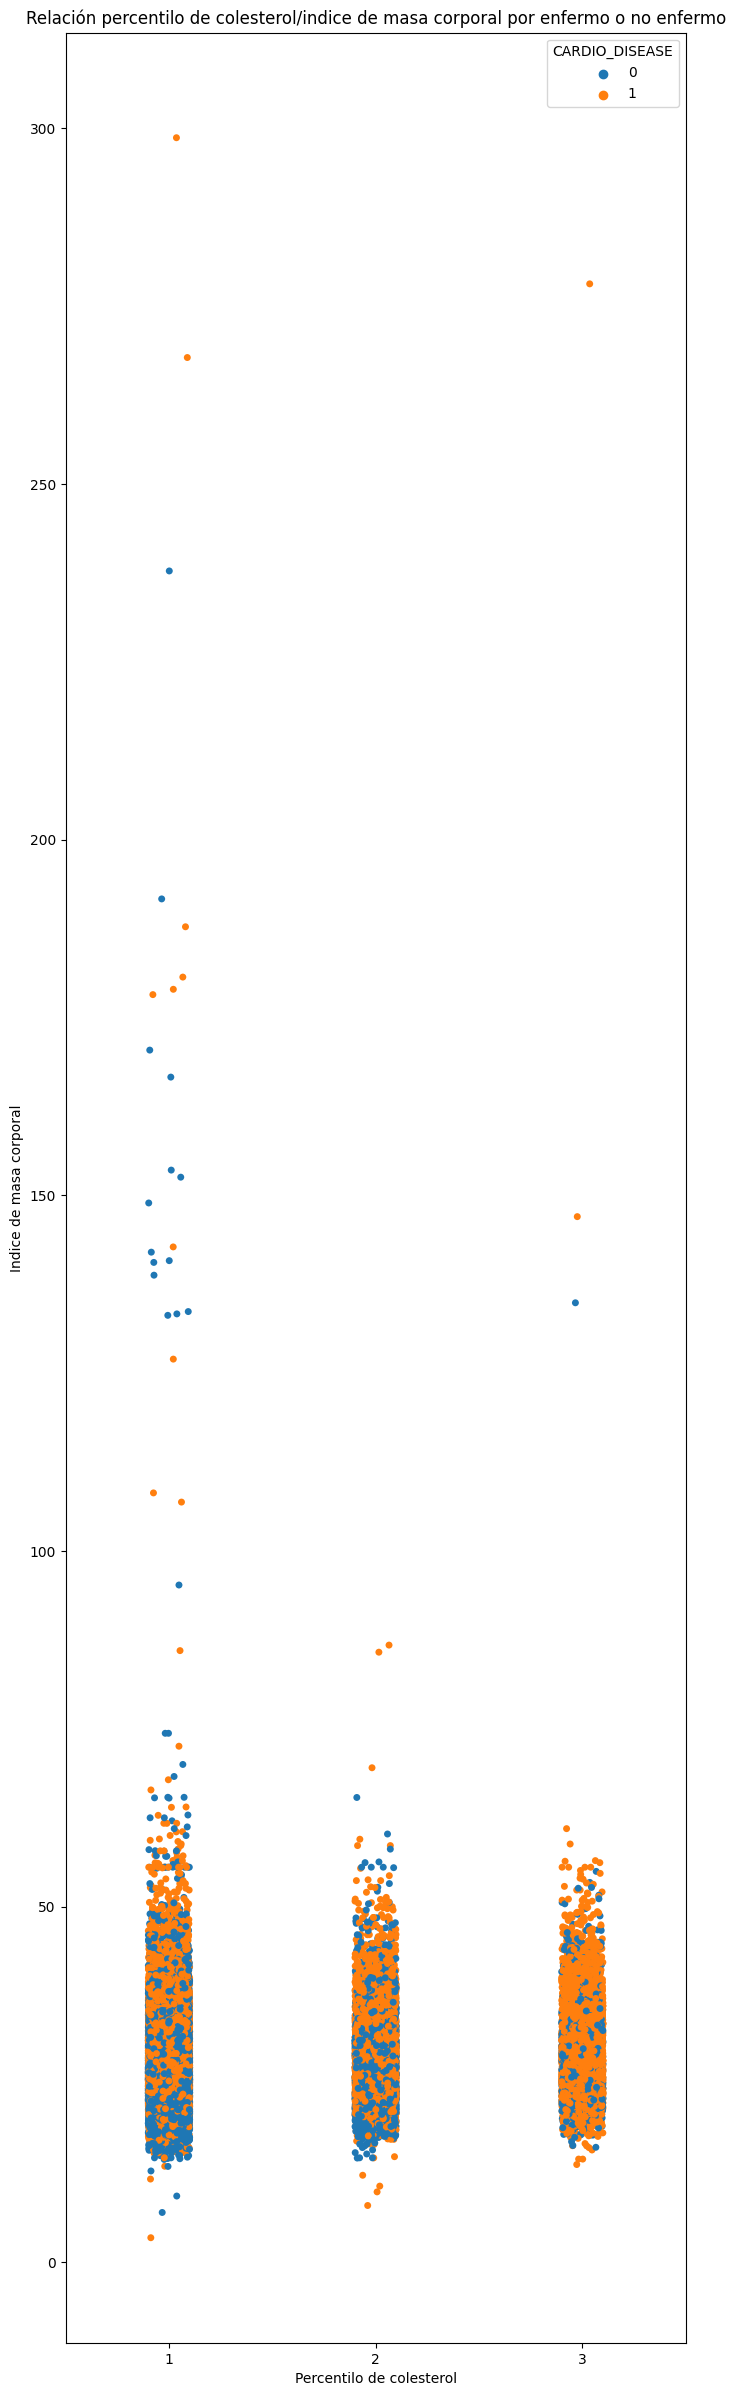

In [ ]:
f, ax = plt.subplots(figsize=(8,10))
sns.stripplot (data=df_cardio_concat2, x='CHOLESTEROL', y='BMI', hue='CARDIO_DISEASE')
ax.set_title ("Relación percentilo de colesterol/indice de masa corporal por enfermo o no enfermo")
ax.set_xlabel ("Percentilo de colesterol")
ax.set_ylabel ("Indice de masa corporal")

Podemos dilucidar en el anterior grafico que en valores bajos o medios de colesterol no presenta una tendencia a enfermedad, pero en valores altos, representados en el percentilo 3 hay una tendencia marcada a ser individuos con enfermedad cardíaca.

Mientras que los indiviuos obesos presentan enfermedad cardíaca en el 100% de los casos.

Ambos parametros son controlables con dieta y ejercicio.

**El alcoholismo (ALCOHOL) y el tabaquismo (SMOKE) son factores influyentes en el diagnostico de enfermedad.**

In [ ]:
df_cardio_concat.groupby(["ALCOHOL", "SMOKE"]).mean()

AGE    GENDER     AP_HIGH     AP_LOW  CHOLESTEROL  \
ALCOHOL SMOKE                                                            
0.0     0      53.436393  1.293158  126.398962  81.238999     1.356946   
        1      52.474976  1.849150  127.719547  81.888810     1.387866   
1.0     0      53.150641  1.475427  128.904915  83.528846     1.548077   
        1      51.822785  1.913594  128.900936  82.762796     1.382499   

                GLUCOSE  PHYSICAL_ACTIVITY  CARDIO_DISEASE        BMI  
ALCOHOL SMOKE                                                          
0.0     0      1.224621           0.798909        0.496894  27.533175  
        1      1.222144           0.830973        0.481350  27.039941  
1.0     0      1.304487           0.842949        0.514957  28.945553  
        1      1.199780           0.847551        0.439185  26.834907

En esta variable aun no he encontrado el gráfico que mejor funcione, pero a primera vista interpretando la lista, podemos ver que en personas que no toman alcohol y que no fuman, tienen un probabilidad de 0.49 de presentar enfermedad, en no tomadores de alcohol y fumadores una probabilidad del 0.48, en alcoholicos no fumadores 0,51, en alcoholicos fumadores un 0,43. En todos son valores muy similares lo cual indicaría que no existe una relación directa. Por lo menos en la muestra analizada tiene una mayor probabilidad de ser sano un alcoholico fumador.

**La actividad fisica (PHYSICAL_ACTIVITY) según la edad (AGE) implica menor incidencia de enfermedad.**

Text(0, 0.5, 'edad')

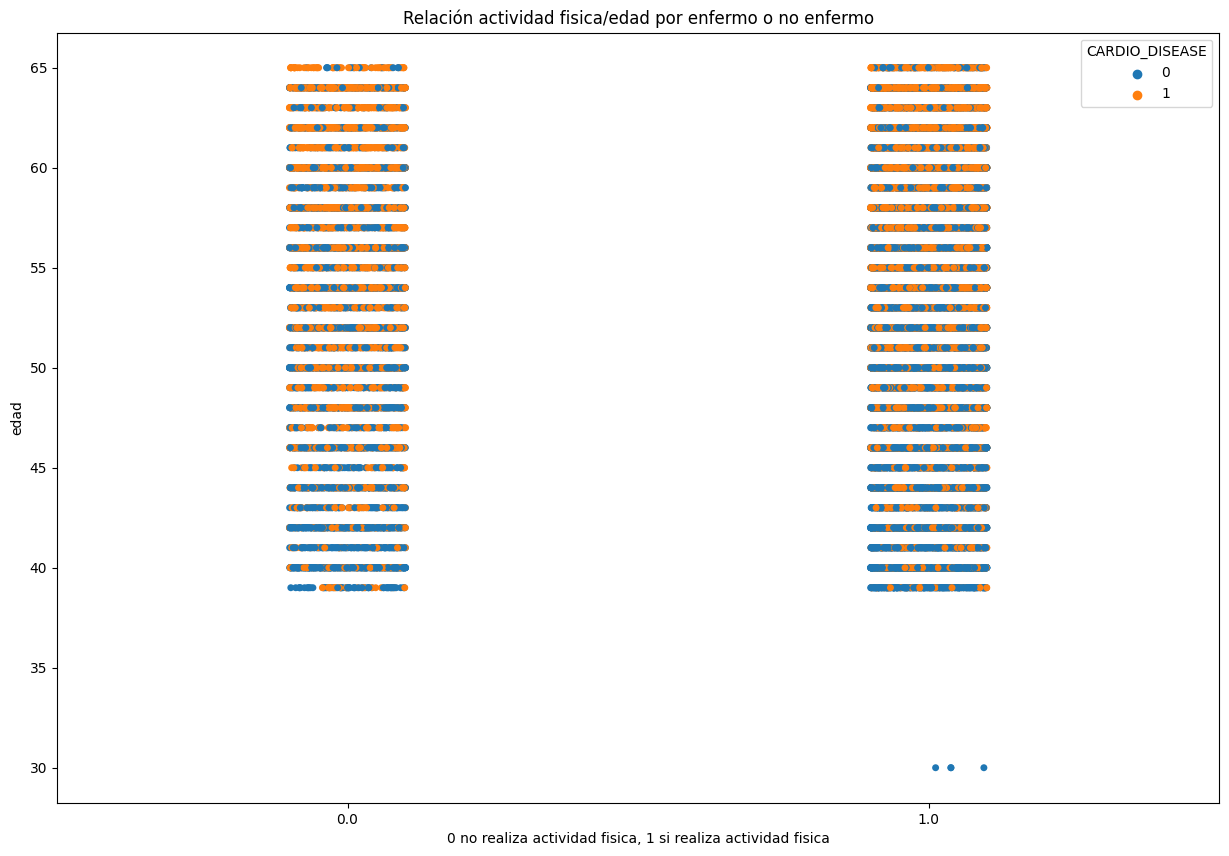

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
sns.stripplot (data=df_cardio_concat2, x='PHYSICAL_ACTIVITY', y='AGE', hue='CARDIO_DISEASE')
ax.set_title ("Relación actividad fisica/edad por enfermo o no enfermo")
ax.set_xlabel ("0 no realiza actividad fisica, 1 si realiza actividad fisica")
ax.set_ylabel ("edad")

En el anterior grafico podemos ver que no hay una gran diferencia entre individuos que realizan o no actividad fisica pero sí una mayor incidencia de enfermedad a mayor edad.


#PCA

Outliers con Isolation Forest


In [55]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

X = df_final.loc[:,df_final.columns!='CARDIO_DISEASE']
y = df_final.loc[:,'CARDIO_DISEASE']
X.shape, y.shape, df_cardio_concat.shape

((72173, 10), (72173,), (72173, 11))

In [56]:
# Separamos la base en una parte de entrenamiento y otra de testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, train_size=0.75, random_state=0)

In [57]:
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [58]:
# seleccionar todas las filas que no son outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

InvalidIndexError: ignored

In [59]:
# Ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# evaluar el modelo
yhat = model.predict(X_test)

In [61]:
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.402


PCA

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
#Aplicacion de PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [64]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20629711])

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [66]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.7048880514298381


#Entrenando variables entrega clase 22



In [77]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred_rfc = rfc.predict(X_test)

In [79]:
# Evaluación de modelo Random Forest
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[6566 2837]
 [3456 5185]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      9403
           1       0.65      0.60      0.62      8641

    accuracy                           0.65     18044
   macro avg       0.65      0.65      0.65     18044
weighted avg       0.65      0.65      0.65     18044



In [83]:
rfc.score(X_test, y_test)

0.651241409886943

In [84]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

In [85]:
accuracies_rfc

array([0.64455939, 0.64492887, 0.63883244, 0.63920192, 0.64659154,
       0.64788472, 0.64843894, 0.64899316, 0.64862368, 0.66056911])

In [86]:
accuracies_rfc.mean()

0.6468623788861203

In [87]:
accuracies_rfc.std()

0.005756088915725893

SVM investigación

In [89]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [90]:
y_pred_svc = svc.predict(X_test)

In [91]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[7094 2309]
 [3006 5635]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      9403
           1       0.71      0.65      0.68      8641

    accuracy                           0.71     18044
   macro avg       0.71      0.70      0.70     18044
weighted avg       0.71      0.71      0.70     18044



In [92]:
svc.score(X_test, y_test)

0.7054422522722235

In [93]:
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)

In [94]:
accuracies_svc

array([0.71660817, 0.71697765, 0.70774062, 0.71272862, 0.70977277,
       0.71162017, 0.71365232, 0.71125069, 0.70995751, 0.71470806])

In [95]:
accuracies_svc.mean()

0.7125016572705741

In [96]:
accuracies_svc.std()

0.0028647948010095885

K-Nearest Neighbor Model Investigation

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [98]:
y_pred_knn = knn.predict(X_test)

In [99]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[6960 2443]
 [2906 5735]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      9403
           1       0.70      0.66      0.68      8641

    accuracy                           0.70     18044
   macro avg       0.70      0.70      0.70     18044
weighted avg       0.70      0.70      0.70     18044



In [100]:
knn.score(X_test, y_test)

0.7035579694081135

In [101]:
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

In [102]:
accuracies_knn

array([0.70921855, 0.71125069, 0.70404582, 0.71106595, 0.70737114,
       0.70940329, 0.71069647, 0.70884907, 0.71032699, 0.70898004])

In [103]:
accuracies_knn.mean()

0.7091208014048467

In [104]:
accuracies_knn.std()

0.0020311934048280237

Naive Bayes Model Investigation

In [105]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [106]:
y_pred_nbc = nbc.predict(X_test)

In [107]:
print(confusion_matrix(y_test, y_pred_nbc))
print(classification_report(y_test, y_pred_nbc))

[[7592 1811]
 [3610 5031]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      9403
           1       0.74      0.58      0.65      8641

    accuracy                           0.70     18044
   macro avg       0.71      0.69      0.69     18044
weighted avg       0.71      0.70      0.70     18044



In [108]:
nbc.score(X_test, y_test)

0.6995677233429395

In [109]:
accuracies_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)

In [110]:
accuracies_nbc

array([0.71180491, 0.70903381, 0.70108997, 0.70940329, 0.71014225,
       0.69961205, 0.70866433, 0.70866433, 0.70607796, 0.71193644])

In [111]:
accuracies_nbc.mean()

0.7076429325039266

In [112]:
accuracies_nbc.std()

0.003987585350325817

XGBoost Model Investigation

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
y_pred_xgb = xgb.predict(X_test)

In [80]:
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[6954 2449]
 [2885 5756]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      9403
           1       0.70      0.67      0.68      8641

    accuracy                           0.70     18044
   macro avg       0.70      0.70      0.70     18044
weighted avg       0.70      0.70      0.70     18044



In [81]:
xgb.score(X_test, y_test)

0.7043892706716914

In [113]:
accuracies_xgb = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)

In [114]:
accuracies_xgb

array([0.71605394, 0.71790135, 0.70700166, 0.70977277, 0.70774062,
       0.71365232, 0.71051173, 0.71198965, 0.71162017, 0.71600148])

In [115]:
accuracies_xgb.mean()

0.712224570505786

In [116]:
accuracies_xgb.std()

0.0034632871219748593

Comparación de modelos

In [117]:
model = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost']
scores = [accuracies_rfc.mean(),accuracies_svc.mean(),accuracies_knn.mean(),accuracies_nbc.mean(),accuracies_xgb.mean()]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy
SVM,0.712502
XGBoost,0.712225
KNN,0.709121
Naive Bayes,0.707643
Random Forest,0.646862


En el anterior cuadro podemos evaluar que los dos mejores modelos para esta base de daros son SVM y XGBoost

Aplicamos SVM

In [118]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Creación del modelo SVM
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [120]:
y_test_pred = modelo.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7029483484814897

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[7422, 1981],
       [3379, 5262]])

In [123]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.6625535129690254

In [124]:
from sklearn.metrics import classification_report
reporte=classification_report(y_test,y_test_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.69      0.79      0.73      9403
           1       0.73      0.61      0.66      8641

    accuracy                           0.70     18044
   macro avg       0.71      0.70      0.70     18044
weighted avg       0.71      0.70      0.70     18044



Aplicamos xgboost

In [125]:
import xgboost
xgb= xgboost.XGBClassifier()

In [126]:
from sklearn.model_selection import GridSearchCV

In [133]:
parameters = {'nthreads': [1],
              'objetive':[0, 1],
              'learning_rate':[0.05,0.1],
              'n_stimators':[200, 100]}

In [127]:
fit_params = {'early_stopping_rounds' :10,
              'eval_metric': 'logloss',
              'eval_set' : [(X_test, y_test)]}

In [134]:
clf = GridSearchCV(xgb,parameters,cv=3,scoring='accuracy')
clf.fit(X_train, y_train, **fit_params)

[14:57:57] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators", "nthreads", "objetive" } are not used.

[0]	validation_0-logloss:0.68272
[1]	validation_0-logloss:0.67333
[2]	validation_0-logloss:0.66486
[3]	validation_0-logloss:0.65717
[4]	validation_0-logloss:0.65022
[5]	validation_0-logloss:0.64388
[6]	validation_0-logloss:0.63814
[7]	validation_0-logloss:0.63294
[8]	validation_0-logloss:0.62820
[9]	validation_0-logloss:0.62390
[10]	validation_0-logloss:0.61998
[11]	validation_0-logloss:0.61646
[12]	validation_0-logloss:0.61322
[13]	validation_0-logloss:0.61031
[14]	validation_0-logloss:0.60764
[15]	validation_0-logloss:0.60525
[16]	validation_0-logloss:0.60305
[17]	validation_0-logloss:0.60104
[18]	validation_0-logloss:0.59919
[19]	validation_0-logloss:0.59757
[20]	validation_0-logloss:0.59605
[21]	validation_0-logloss:0.59468
[22]	validation_0-logloss:0.59343
[23]	validation_0-logloss:0.59232
[24]	validation_0-logloss:0.59130
[25]	validation_0-logloss:0.59032
[26]	validati

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_stimators': [200, 100], 'nthreads': [1],
                         'objetive': [0, 1]},
             scoring='accuracy')

In [135]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, n_stimators=200, nthreads=1,
              num_parallel_tree=None, ...)

In [136]:
clf.best_score_

0.7116333204012637